In [2]:
# 데이터프레임 3개
# 1. feature_selection : 피쳐 제거(다중 공선성, 상관계수, 오른쪽,하단부 공정)
# 2. feature_extraction : PCA후 BGMM으로 군집 확률로 변수화
# 3. scaled_df : 1+2 후 Robust scaler로 스케일링함

In [3]:
# 한글, 음수 시각화 설정

#시각화 패키지
import matplotlib.pyplot as plt

#시각화에서 한글을 사용하기 위한 설정
import platform
from matplotlib import font_manager, rc

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
    
#윈도우의 경우
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
    
#시각화에서 음수를 표현하기 위한 설정
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False 

import warnings
warnings.filterwarnings('ignore')

# 분류 모델

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
Vac_sample_df = pd.read_csv('../data/Vac_sample_df.csv', index_col= 0)
# Vac_sample_df.info()

Vac_sample_df = Vac_sample_df.sample(frac= 1, random_state= 42).reset_index(drop= True)
Vac_sample_df[:10]

,X1WOS45106_PV,X1WOS45109_PV,DB.N2.SCREEN.FLOW.LEFT.1FI49011_PV,N2.TO.EA1313A.1FI33503A_PV,ROOF.HEATING.Zone.1.1JIC31101.PV,ROOF.HEATING.Zone.2.1JIC31102.PV,ROOF.HEATING.Zone.3.1JIC31103.PV,ROOF.HEATING.Zone.4.1JIC31104.PV,ATM.FLOW.SECT.9.N2.1FIC33415.PV,Gross.width,...,S_AB9_AB10_L_L,S_C2_C3_U_R,투입.LEFT.,ROLLDOWN.폐기.LEFT.,진공패드.폐기.LEFT.,폐기율...,bgm_feature_0,bgm_feature_1,bgm_feature_2,Vac_defect
0,1.0,1.0,0.261261,0.230769,1.000000,0.777778,0.923077,1.0,0.0,0.878201,...,0.831538,0.213221,0.699187,0.095310,0.187212,0.171860,1.000000e+00,8.721561e-26,1.188526e-128,1
1,1.0,1.0,0.720721,0.346154,1.000000,0.777778,0.923077,1.0,0.0,0.919031,...,0.898281,0.149570,0.707317,0.058269,0.028988,0.080317,1.237266e-26,1.000000e+00,5.615816e-125,0
2,1.0,1.0,0.000000,0.346154,0.777778,0.444444,1.000000,1.0,0.2,0.941176,...,0.514183,0.579245,0.788618,0.019803,0.187212,0.084806,8.001074e-109,0.000000e+00,1.000000e+00,1
3,1.0,1.0,0.909910,0.769231,1.000000,0.777778,0.923077,1.0,1.0,0.868512,...,0.735760,0.315249,0.869919,0.039221,0.057158,0.083772,1.000000e+00,1.101007e-185,0.000000e+00,0
4,1.0,1.0,0.765766,0.346154,0.777778,0.444444,0.846154,1.0,0.2,0.905190,...,0.640463,0.463560,0.691057,0.019803,0.000000,0.009703,1.000000e+00,0.000000e+00,4.817782e-62,0
5,0.5,0.0,0.000000,0.346154,0.833333,0.555556,1.000000,1.0,0.2,0.939100,...,0.553628,0.228749,0.186992,0.000000,0.137201,0.177999,4.271835e-235,0.000000e+00,1.000000e+00,1
6,1.0,1.0,0.000000,0.307692,0.500000,0.888889,0.230769,1.0,0.2,0.933564,...,0.503192,0.467216,0.479675,0.000000,0.000000,0.027738,0.000000e+00,0.000000e+00,1.000000e+00,0
7,1.0,1.0,0.720721,0.346154,0.888889,0.777778,0.923077,1.0,0.0,0.862976,...,0.822069,0.340349,0.650407,0.000000,0.057158,0.031198,9.758930e-66,1.000000e+00,1.000937e-176,0
8,1.0,1.0,0.900901,0.346154,1.000000,0.777778,0.923077,0.0,0.4,0.912111,...,0.812599,0.200361,0.821138,0.058269,0.162519,0.196195,0.000000e+00,1.000000e+00,1.616311e-213,1
9,1.0,1.0,0.801802,0.576923,1.000000,0.777778,0.923077,1.0,1.0,0.883737,...,0.787257,0.238426,0.325203,0.019803,0.084557,0.148051,1.000000e+00,4.377723e-107,0.000000e+00,1


In [6]:
X = Vac_sample_df.iloc[:, :-1]
y= Vac_sample_df['Vac_defect']

X.shape

(2208, 97)

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 42)
X_train.shape

(1545, 97)

In [8]:
# 분류 모델

# 로지스틱 회귀
# 트리 기반 모델 : RandomForest, CatBoost
# 딥러닝 : 간단한 MLP

# 평가 지표
# ROC-AUC, Precision-Recall Curve, F1 Score 등

# Recall: 실제 불량 데이터 중 모델이 불량으로 예측한 비율

# 선형 모델

## 1. 로지스틱 회귀

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score

log_clf = LogisticRegression(random_state= 42, solver= 'lbfgs', multi_class= 'auto')

log_clf.fit(X_train, y_train)

log_preds = log_clf.predict(X_test)

print('로지스틱 회귀 재현율 :', recall_score(y_test, log_preds)) # 85.6%

로지스틱 회귀 재현율 : 0.8558282208588958


# 트리 기반 모델

## 1. 랜덤포레스트

In [30]:
# Feature Importance
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators= 100, random_state= 42)
rf_clf.fit(X_train, y_train)

rf_importances = rf_clf.feature_importances_

rf_importance_df = pd.DataFrame({
  'feature' : X_train.columns,
  'importance' : rf_importances
})

# rf_importance_df.info()
rf_importance_df[:5]
rf_importance_df.sort_values(by= 'importance', ascending= False)[:10]['feature'].values

array(['진공패드.폐기.LEFT.', '폐기율...', 'DB.N2.SCREEN.FLOW.LEFT.1FI49011_PV',
       'D_AB2_R_UL', 'X.2.LEHR.O2.ANALYZER.1AI44113.PV',
       'DB.HEAT.BOTTOM.1.1JIC40308.PV', '투입.LEFT.',
       'TMP.TIN..BAY.1.LEFT.1TI30201.PV',
       'ROOF.HEATING.Zone21.1JIC31121.PV',
       'DB.HEAT.TOP.7.1.TMP.1TI40307.PV'], dtype=object)

- 하이퍼 파라미터 튜닝

In [32]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators' : [30, 50, 100],
    'max_depth' : [10, 15, 20]
}


estimator = RandomForestClassifier(random_state= 42)
grid_cv = GridSearchCV(estimator= estimator, param_grid= params, cv= 3)
grid_cv.fit(X_train, y_train)

print(grid_cv.best_params_)

{'max_depth': 15, 'n_estimators': 50}


In [33]:
from sklearn.metrics import recall_score

best_rf_clf = grid_cv.best_estimator_
best_rf_clf.fit(X_train, y_train)

rf_preds = best_rf_clf.predict(X_test)

print('test 재현율 :', recall_score(y_test, rf_preds)) # 94.2%

test 재현율 : 0.941717791411043


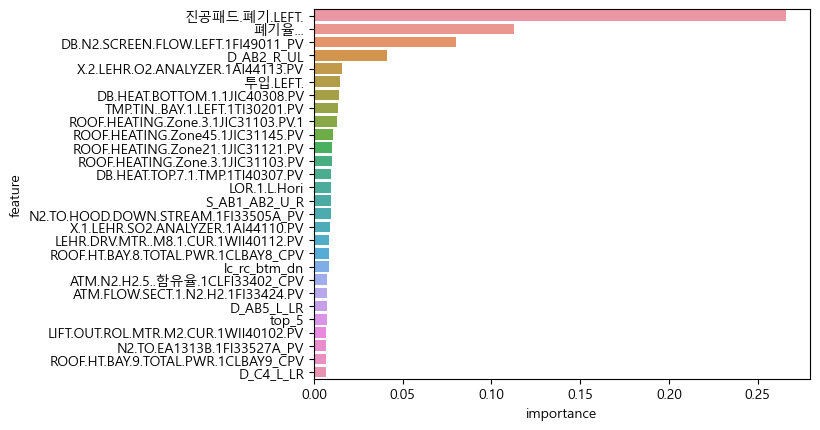

In [42]:
# 상위 28개의 피쳐 - PCA로 90%의 데이터 설명 가능
import seaborn as sns

feat_importance_df = pd.DataFrame({
  'feature' : X_train.columns,
  'importance' : best_rf_clf.feature_importances_
})

PCA_feat_importance_28 = feat_importance_df.sort_values(by= 'importance', ascending= False)[:28]
# print(PCA_feat_importance_28)

sns.barplot(x= PCA_feat_importance_28['importance'],
            y= PCA_feat_importance_28['feature'])
plt.show()

## 2. XG Boosting

In [35]:
import xgboost as xgb

train_set = xgb.DMatrix(data= X_train, label= y_train)
test_set = xgb.DMatrix(data= X_test, label= y_test)

# 하이퍼 파라미터 생성
# objective에 이진 분류인지 멀티 클래스 분류인지 설정
params = {'max_depth' : 5, 'eta' : 0.1, # eta는 학습률
          'objective' : 'binary:logistic', 'eval_matric' : 'logloss'}
# 예측 횟수
num_rounds = 700

# 일반 그라디언트 부스팅은 예측기의 개수를 설정하면 조기종료하지 않고 무조건 예측기 개수만큼 훈련
wlist= [(train_set, 'train'), (test_set, 'test')]
xgb_model = xgb.train(params= params, dtrain= train_set, num_boost_round= num_rounds, 
                      evals= wlist, early_stopping_rounds= 100)


# max_depth= 5, eta= 0.1 : [262]	train-logloss:0.00169	test-logloss:0.01852 ** 

# max_depth= 5, eta= 0.01 : [699]	train-logloss:0.00312	test-logloss:0.01905
# max_depth= 7, eta= 0.01 : [699]	train-logloss:0.00312	test-logloss:0.01905
# max_depth= 10, eta= 0.01 : [699]	train-logloss:0.00312	test-logloss:0.01905
# max_depth= 10, eta= 0.1 : [263]	train-logloss:0.00169	test-logloss:0.01852
# max_depth= 3, eta= 0.1 : [280]	train-logloss:0.00190	test-logloss:0.01944


[0]	train-logloss:0.60383	test-logloss:0.60527
[1]	train-logloss:0.52698	test-logloss:0.52892
[2]	train-logloss:0.46273	test-logloss:0.46531
[3]	train-logloss:0.40813	test-logloss:0.41095
[4]	train-logloss:0.36140	test-logloss:0.36446
[5]	train-logloss:0.32109	test-logloss:0.32437
[6]	train-logloss:0.28608	test-logloss:0.28957
[7]	train-logloss:0.25551	test-logloss:0.25920
[8]	train-logloss:0.22898	test-logloss:0.23306
[9]	train-logloss:0.20532	test-logloss:0.20958
[10]	train-logloss:0.18441	test-logloss:0.18884
[11]	train-logloss:0.16588	test-logloss:0.17049
[12]	train-logloss:0.14941	test-logloss:0.15419
[13]	train-logloss:0.13475	test-logloss:0.13970
[14]	train-logloss:0.12168	test-logloss:0.12678
[15]	train-logloss:0.10999	test-logloss:0.11525
[16]	train-logloss:0.09953	test-logloss:0.10495
[17]	train-logloss:0.09015	test-logloss:0.09573
[18]	train-logloss:0.08174	test-logloss:0.08747
[19]	train-logloss:0.07419	test-logloss:0.08006
[20]	train-logloss:0.06741	test-logloss:0.07341
[2

In [36]:
from sklearn.metrics import recall_score

xgb_preds= xgb_model.predict(test_set)
print(np.round(xgb_preds[:10], 3)) # 1로 판정할 확률을 리턴함

xgb_preds = [1 if pred > 0.5 else 0 for pred in xgb_preds]

print(xgb_preds[:10])

print('재현율 :', recall_score(y_test, xgb_preds))

[0.    0.999 0.    0.    0.    0.994 0.996 0.999 0.999 0.998]
[0, 1, 0, 0, 0, 1, 1, 1, 1, 1]
재현율 : 0.9938650306748467


In [37]:
# 다른 평가 지표
from sklearn.metrics import accuracy_score, precision_score, f1_score, roc_auc_score

print('xgb 정확도 :', accuracy_score(y_test, xgb_preds))
print('xgb 정밀도 :', precision_score(y_test, xgb_preds))
print('xgb f1 score :', f1_score(y_test, xgb_preds))
print('xgb roc-auc-score :', roc_auc_score(y_test, xgb_preds))

xgb 정확도 : 0.9969834087481146
xgb 정밀도 : 1.0
xgb f1 score : 0.9969230769230769
xgb roc-auc-score : 0.9969325153374233


In [40]:
# 1.0????
# 한 번 다른 샘플 데이터로도 확인

random_sample_df = pd.read_csv('../data/Vac_total_df.csv', index_col= 0)
random_sample_df.shape # (8143, 98)

X_sample = random_sample_df.iloc[: , :-1]
y_sample = random_sample_df['Vac_defect']

X_sample.shape
y_sample[:10]

X_sample_test, X_sample_valid, y_sample_test, y_sample_valid = train_test_split(X_sample, y_sample, test_size= 0.5, stratify= y_sample, random_state= 42)
X_sample_test.shape

test_sample_set = xgb.DMatrix(data= X_sample_test, label= y_sample_test)
valid_sample_set = xgb.DMatrix(data= X_sample_valid, label= y_sample_valid)

xgb_sample_preds = xgb_model.predict(test_sample_set)
xgb_sample_preds = [1 if x > 0.5 else 0 for x in xgb_sample_preds]

xgb_sample_preds_2 = xgb_model.predict(valid_sample_set)
xgb_sample_preds_2 = [1 if x > 0.5 else 0 for x in xgb_sample_preds_2]

print('sample 재현율 :', recall_score(y_sample_test, xgb_sample_preds))
print('sample 2 재현율 :', recall_score(y_sample_valid, xgb_sample_preds_2))

## 
print('오류 확인용 재현율 :', recall_score(y_sample_test, xgb_sample_preds_2[:4071])) # 잘 안나오는게 맞는건데 0.1472.. 그럼 모델은 잘 되는건가? 
print('xgb sample 정확도 :', accuracy_score(y_sample_test, xgb_sample_preds))



sample 재현율 : 1.0
sample 2 재현율 : 0.9963768115942029
오류 확인용 재현율 : 0.14855072463768115
xgb sample 정확도 : 1.0


['진공패드.폐기.LEFT.', '투입.LEFT.', '폐기율...', 'DB.N2.SCREEN.FLOW.LEFT.1FI49011_PV', 'l_r_tin_bay10', 'D_AB11_U_LR', 'ATM.FLOW.SECT.3.N2.1FI33403.PV', 'S_AB1_AB2_U_L', 'DB.HEAT.TOP.7.1.TMP.1TI40307.PV', 'ROOF.HEATING.Zone39.1JIC31139.PV', 'ROOF.HEATING.Zone86.1JIC31186.PV', 'S_AB2_AB3_U_R', 'TMP.TIN..BAY.1.LEFT.1TI30201.PV', 'N2.TO.EA1313B.1FI33527A_PV', 'D_C4_L_LR', 'X.1.LEHR.O2.ANALYZER.1AI44111.PV', 'ROOF.HEATING.Zone45.1JIC31145.PV', 'ATM.N2.H2.5..함유율.1CLFI33402_CPV', 'LOR.2.L.Axis', 'LOR.2.L.Hori', 'X.1.LEHR.SO2.ANALYZER.1AI44110.PV', 'LEHR.AB1.PRESS.1PI40302.PV', 'ROOF.HT.BAY.9.TOTAL.PWR.1CLBAY9_CPV', 'ROOF.HEATING.Zone57.1JIC31157.PV', 'LOR.1.L.Hori', 'lc_rc_btm_dn', 'D_GLS_RET_LR', 'N2.TO.EA1313A.1FI33503A_PV']


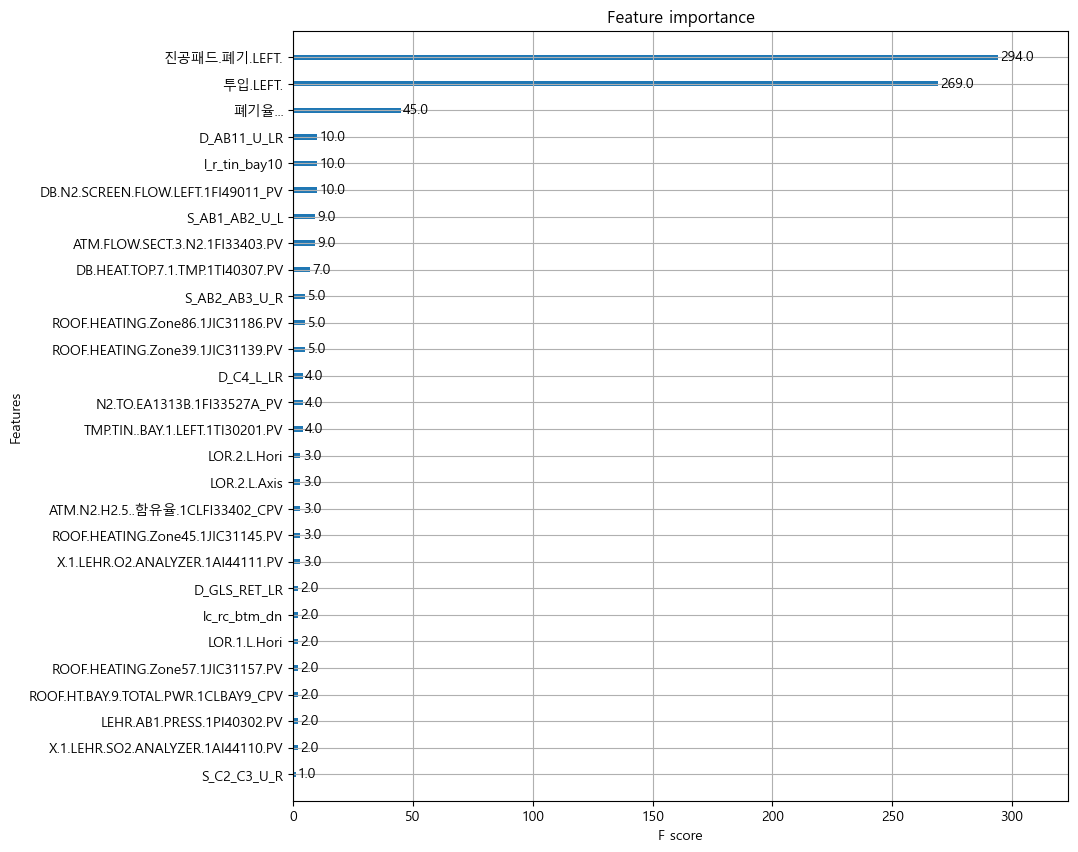

In [43]:
# 피쳐 중요도 시각화
import matplotlib.pyplot as plt
from xgboost import plot_importance

fig, ax = plt.subplots(figsize= (10, 10))

plot_importance(booster= xgb_model, ax= ax, max_num_features= 28)

feat_importance = xgb_model.get_score(importance_type='weight') # dict [('feature', score')]
sorted_feat_importance = sorted(feat_importance.items(), key=lambda x: x[1], reverse=True) # 중요도 data, score에 따라 내림차순으로 정렬렬

xgb_feat_importance_28 = [feature for feature, importance in sorted_feat_importance[:28]]

print(xgb_feat_importance_28)

## 3. MLP

In [19]:
import tensorflow as tf
from tensorflow import keras

In [20]:
X_train_MLP= X_train.values.reshape(-1, 97)
X_test_MLP= X_test.values.reshape(-1, 97)

In [21]:
y_train_MLP = keras.utils.to_categorical(y_train, num_classes= 2)
y_test_MLP = keras.utils.to_categorical(y_test, num_classes= 2)

In [22]:
y_test_MLP[:10]

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [23]:
# 딥러닝 모델은 기본적으로 블랙박스 - shap를 활용하여 feature importance 파악
MLP_model = keras.models.Sequential([
  keras.layers.Flatten(input_shape= (97, )),
  keras.layers.Dense(units= 64, activation= 'relu'),
  keras.layers.Dense(units= 32, activation= 'relu'),
  keras.layers.Dense(units= 2, activation= 'sigmoid')
])

MLP_model.compile(optimizer= keras.optimizers.Adam(learning_rate= 0.05),
                  loss= 'binary_crossentropy',
                  metrics= [keras.metrics.Recall()]) # recall은 위의 변수와 겹쳐서 문제발생했음

MLP_model.summary()

MLP_history = MLP_model.fit(X_train_MLP, y_train_MLP, epochs= 30, batch_size= 32, validation_split= 0.2)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 97)                0         
                                                                 
 dense (Dense)               (None, 64)                6272      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 8418 (32.88 KB)
Trainable params: 8418 (32.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/30
45/45 [==============================] - 2s 14ms/step - loss: 0.6900 - recall: 0.6424 - val_loss: 0.4564 - val_recall: 0.8531
Epoch 2/30
45/45 

In [24]:
MLP_model.evaluate(X_test_MLP, y_test_MLP)

14/14 [==============================] - 0s 3ms/step - loss: 0.1584 - recall: 0.9457


[0.15844158828258514, 0.9457013607025146]

In [25]:
# pip install shap

In [26]:
# import shap
# import pandas as pd
# import numpy as np

# # 1. SHAP Explainer 생성
# explainer = shap.Explainer(MLP_model, X_train_MLP)

# # 2. SHAP Values 계산
# shap_values = explainer(X_test_MLP)

# # 3. Feature Names 설정
# if isinstance(X_test_MLP, pd.DataFrame):
#     # Pandas DataFrame인 경우
#     feature_names = X_test_MLP.columns
# else:
#     # NumPy ndarray인 경우
#     feature_names = [f"Feature {i}" for i in range(X_test_MLP.shape[1])]

# # 4. SHAP Summary Plot 출력
# shap.summary_plot(
#     shap_values,
#     X_test_MLP,
#     feature_names=feature_names,  # 반드시 리스트 형태로 변환
#     # plot_size=(12, 8),
#     # max_display=28  # 표시할 최대 피처 개수 설정
# )

## 주요 피쳐 랜덤포레스트

In [ ]:
## 공정 조건 알아보기

In [46]:
# 중복된 주요 피쳐 
PCA_feat_importance_28_list = list(PCA_feat_importance_28['feature'].values)

common_imp_factors = list(set(PCA_feat_importance_28_list) & set(xgb_feat_importance_28))
common_imp_factors

Vac_imp_factor_df = Vac_sample_df[common_imp_factors]
Vac_imp_factor_df.shape # (2094, 8)
Vac_imp_factor_df.info()

X = Vac_imp_factor_df.copy()
y= y

y.shape
y.info() # RD_defect

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 42)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2208 entries, 0 to 2207
Data columns (total 14 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   DB.HEAT.TOP.7.1.TMP.1TI40307.PV      2208 non-null   float64
 1   N2.TO.EA1313B.1FI33527A_PV           2208 non-null   float64
 2   폐기율...                               2208 non-null   float64
 3   D_C4_L_LR                            2208 non-null   float64
 4   lc_rc_btm_dn                         2208 non-null   float64
 5   진공패드.폐기.LEFT.                        2208 non-null   float64
 6   X.1.LEHR.SO2.ANALYZER.1AI44110.PV    2208 non-null   float64
 7   LOR.1.L.Hori                         2208 non-null   float64
 8   ROOF.HEATING.Zone45.1JIC31145.PV     2208 non-null   float64
 9   DB.N2.SCREEN.FLOW.LEFT.1FI49011_PV   2208 non-null   float64
 10  투입.LEFT.                             2208 non-null   float64
 11  TMP.TIN..BAY.1.LEFT.1TI30201.P

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [5, 10, 20]}


tree_clf = DecisionTreeClassifier(random_state= 42)
grid_cv = GridSearchCV(estimator= tree_clf, param_grid= params, cv= 3)
grid_cv.fit(X_train, y_train)
print(grid_cv.best_params_)

best_tree_clf = grid_cv.best_estimator_


{'max_depth': 10}


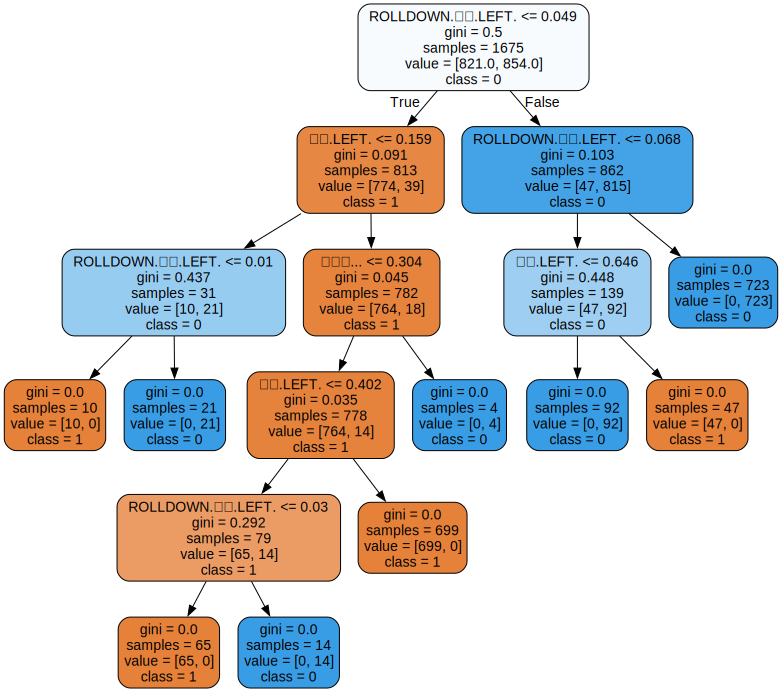

In [48]:
# 트리 시각화
from sklearn.tree import export_graphviz
import graphviz

feature_names = list(map(str, X_train.columns))  
class_names = list(map(str, y.unique()))

export_graphviz(
  best_tree_clf,
  out_file= 'Vac_tree.dot',
  feature_names= feature_names,
  class_names= class_names,
  rounded= True,
  filled= True
)

with open('RD_tree.dot') as f :
  dot_graph = f.read()

src = graphviz.Source(dot_graph)
src